# Assignment: Just Eat Takeaway stock market analysis 

Just Eat Takeaway (JET) and OCADO (OCA) analysis

## Download the required data

You need to download the daily prices from 02/03/2020 to 28/02/2022. Then set the last 20 days as the test set and the first 485 days (for this example, yours may vary) as the training set.

In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
#from sklearn.metrics import mean_absolute_percentage_error as MAPE
import statsmodels.api as sa
import statsmodels.formula.api as sfa
from statsmodels.tsa.api import ExponentialSmoothing as TES 
from statsmodels.tsa.api import SimpleExpSmoothing as SES
from statsmodels.tsa.api import Holt as DES

In [2]:
# Download prices
JET=yf.download('JET.L',start='2020-03-02',end='2022-02-28')
OCA=yf.download('OCDO.L',start='2020-03-02',end='2022-02-28')
FTSE=yf.download('^FTSE',start='2020-03-02',end='2022-02-28')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
JET

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-02,7100.0,7115.000000,6670.0,6785.0,6785.0,489282
2020-03-03,6870.0,7155.000000,6860.0,7090.0,7090.0,511737
2020-03-04,7095.0,7229.375000,7025.0,7200.0,7200.0,202212
2020-03-05,7240.0,7315.000000,7045.0,7150.0,7150.0,199734
2020-03-06,6980.0,7000.000000,6685.0,6715.0,6715.0,191894
...,...,...,...,...,...,...
2022-02-21,3017.0,3035.500000,2846.5,2898.0,2898.0,409736
2022-02-22,2816.5,2930.500000,2783.0,2800.0,2800.0,731866
2022-02-23,2800.0,2833.699951,2657.0,2657.5,2657.5,1652627


In [4]:
OCA

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-02,1095.0,1135.500000,1064.0,1119.5,1119.5,3223329
2020-03-03,1146.5,1158.387939,1119.5,1126.0,1126.0,3298364
2020-03-04,1128.0,1165.000000,1119.5,1153.0,1153.0,2447273
2020-03-05,1154.5,1157.694946,1117.0,1123.0,1123.0,3449478
2020-03-06,1100.5,1138.000000,1089.5,1122.0,1122.0,2578043
...,...,...,...,...,...,...
2022-02-21,1303.0,1313.500000,1283.0,1300.0,1300.0,1625391
2022-02-22,1278.5,1321.500000,1265.5,1300.5,1300.5,1183638
2022-02-23,1272.0,1340.500000,1272.0,1326.0,1326.0,1312021


In [5]:
FTSE

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-02,6580.600098,6775.200195,6496.000000,6654.899902,6654.899902,1770844200
2020-03-03,6654.899902,6846.299805,6654.899902,6718.200195,6718.200195,1277190200
2020-03-04,6718.200195,6856.299805,6700.200195,6815.600098,6815.600098,1115783100
2020-03-05,6815.600098,6834.100098,6662.600098,6705.399902,6705.399902,1146893100
2020-03-06,6705.399902,6705.399902,6431.399902,6462.600098,6462.600098,1377953500
...,...,...,...,...,...,...
2022-02-21,7513.600098,7571.100098,7446.399902,7484.299805,7484.299805,622636900
2022-02-22,7484.299805,7531.299805,7365.000000,7494.200195,7494.200195,1018787100
2022-02-23,7494.200195,7550.000000,7490.500000,7498.200195,7498.200195,862648700


In [6]:
JET.index

DatetimeIndex(['2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
               '2020-03-06', '2020-03-09', '2020-03-10', '2020-03-11',
               '2020-03-12', '2020-03-13',
               ...
               '2022-02-14', '2022-02-15', '2022-02-16', '2022-02-17',
               '2022-02-18', '2022-02-21', '2022-02-22', '2022-02-23',
               '2022-02-24', '2022-02-25'],
              dtype='datetime64[ns]', name='Date', length=504, freq=None)

In [7]:
#check is there any point of JET index different from DHHER index
JET.index.difference(OCA.index)

DatetimeIndex([], dtype='datetime64[ns]', name='Date', freq=None)

In [8]:
#check is there any point of JET index different from FTSE index
JET.index.difference(FTSE.index)

DatetimeIndex(['2020-12-22'], dtype='datetime64[ns]', name='Date', freq=None)

In [9]:
#drop the row
JET=JET.drop(['2020-12-22'])
OCA=OCA.drop(['2020-12-22'])

In [10]:
JET.head(209)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-02,7100.0,7115.000000,6670.0,6785.0,6785.0,489282
2020-03-03,6870.0,7155.000000,6860.0,7090.0,7090.0,511737
2020-03-04,7095.0,7229.375000,7025.0,7200.0,7200.0,202212
2020-03-05,7240.0,7315.000000,7045.0,7150.0,7150.0,199734
2020-03-06,6980.0,7000.000000,6685.0,6715.0,6715.0,191894
...,...,...,...,...,...,...
2020-12-18,7930.0,8090.000000,7828.0,7970.0,7970.0,260981
2020-12-21,8128.0,8272.700195,7828.0,8120.0,8120.0,409030
2020-12-23,8178.0,8188.000000,7964.0,8000.0,8000.0,116011


In [11]:
OCA.head(209)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-02,1095.0,1135.500000,1064.000000,1119.5,1119.5,3223329
2020-03-03,1146.5,1158.387939,1119.500000,1126.0,1126.0,3298364
2020-03-04,1128.0,1165.000000,1119.500000,1153.0,1153.0,2447273
2020-03-05,1154.5,1157.694946,1117.000000,1123.0,1123.0,3449478
2020-03-06,1100.5,1138.000000,1089.500000,1122.0,1122.0,2578043
...,...,...,...,...,...,...
2020-12-18,2225.0,2251.000000,2209.000000,2209.0,2209.0,1857780
2020-12-21,2229.0,2345.150879,2212.000000,2332.0,2332.0,2601307
2020-12-23,2264.0,2276.000000,2189.000000,2239.0,2239.0,1432517


### Training and Test sets

In [12]:
# Drop the columns we don't need
JET=JET.drop(columns=['Open','High','Low','Close','Volume'])
OCA=OCA.drop(columns=['Open','High','Low','Close','Volume'])
FTSE=FTSE.drop(columns=['Open','High','Low','Close','Volume'])

In [13]:
# Training sets
JETtr=JET.iloc[0:482]
OCAtr=OCA.iloc[0:482]
FTSEtr=FTSE.iloc[0:482]

In [14]:
# Test set
JETte=JET.iloc[483:502]
OCAte=OCA.iloc[483:502]
FTSEte=FTSE.iloc[483:502]

### Daily Returns

In [15]:
returns1=(JETtr['Adj Close']-JETtr.shift(1)['Adj Close'])/JETtr.shift(1)['Adj Close']
returns2=(OCAtr['Adj Close']-OCAtr.shift(1)['Adj Close'])/OCAtr.shift(1)['Adj Close']
returns3=(FTSEtr['Adj Close']-FTSEtr.shift(1)['Adj Close'])/FTSEtr.shift(1)['Adj Close']

In [16]:
JETtr['Return']=returns1
OCAtr['Return']=returns2
FTSEtr['Return']=returns3

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19828\1542499052.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  JETtr['Return']=returns1
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19828\1542499052.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  OCAtr['Return']=returns2
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19828\1542499052.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [17]:
JETte['Return']=(JETte['Adj Close']-JETte.shift(1)['Adj Close'])/JETte.shift(1)['Adj Close']
JETte.iloc[0,1]=(JETte.iloc[0,0]-JETtr.iloc[-1,0])/JETtr.iloc[-1,0]
OCAte['Return']=(OCAte['Adj Close']-OCAte.shift(1)['Adj Close'])/OCAte.shift(1)['Adj Close']
OCAte.iloc[0,1]=(OCAte.iloc[0,0]-OCAtr.iloc[-1,0])/OCAtr.iloc[-1,0]
FTSEte['Return']=(FTSEte['Adj Close']-FTSEte.shift(1)['Adj Close'])/FTSEte.shift(1)['Adj Close']
FTSEte.iloc[0,1]=(FTSEte.iloc[0,0]-FTSEtr.iloc[-1,0])/FTSEtr.iloc[-1,0]

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19828\3770251203.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  JETte['Return']=(JETte['Adj Close']-JETte.shift(1)['Adj Close'])/JETte.shift(1)['Adj Close']
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19828\3770251203.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  OCAte['Return']=(OCAte['Adj Close']-OCAte.shift(1)['Adj Close'])/OCAte.shift(1)['Adj Close']
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19828\3770251203.py:5: SettingWithCopyWarning: 
A value 

## Descriptive Analytics

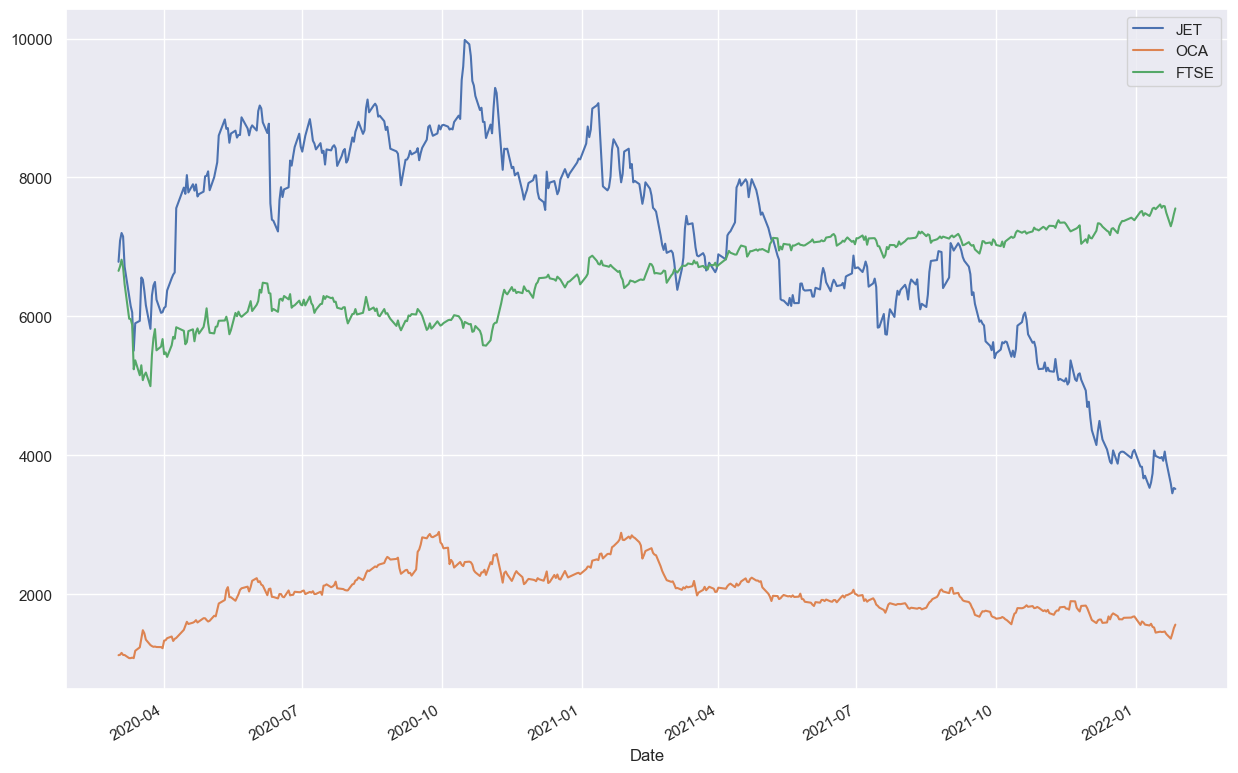

In [18]:
JETtr['Adj Close'].plot(figsize=(15,10), label='JET')
OCAtr['Adj Close'].plot(label='OCA')
FTSEtr['Adj Close'].plot(label='FTSE')
plt.legend()
plt.show()

In [19]:
#define a modified FTSE
mFTSEtr=pd.DataFrame()
mFTSEtr['m Adj Close']=FTSEtr['Adj Close']/5 

In [20]:
mJETtr=pd.DataFrame()
mJETtr['m Adj Close']=JETtr['Adj Close']/5

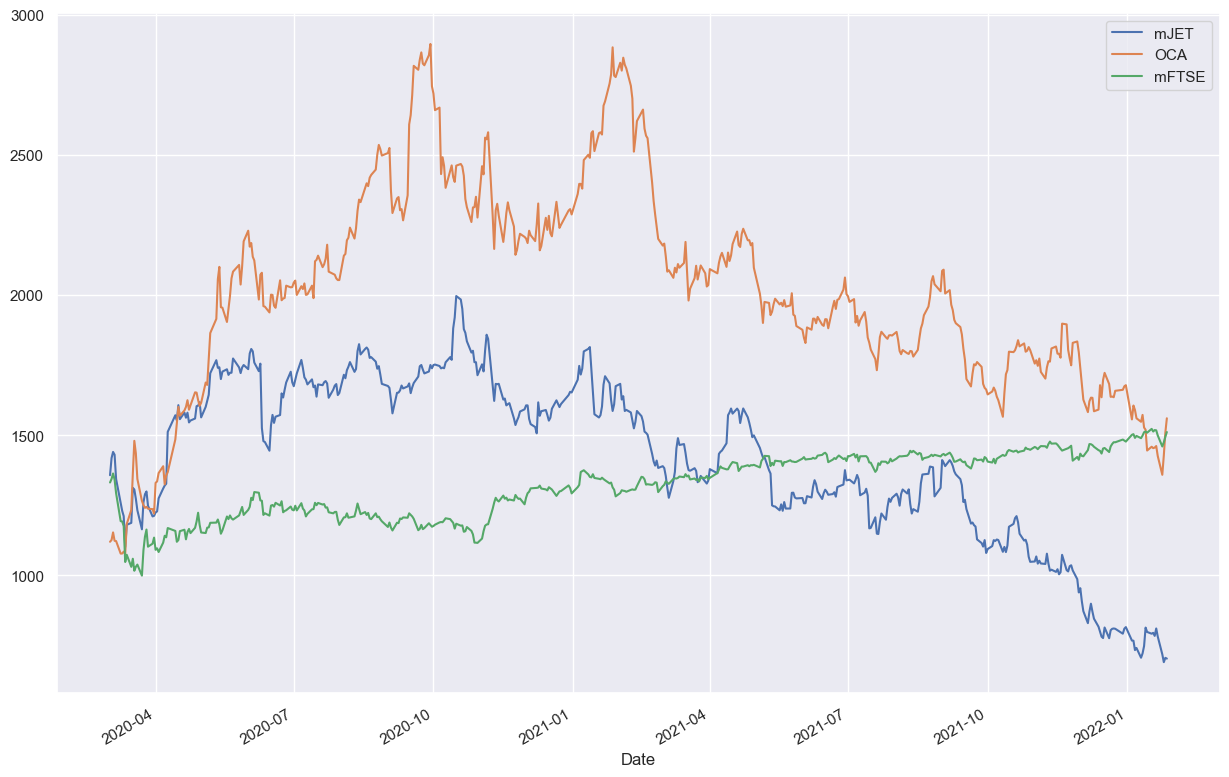

In [21]:
mJETtr['m Adj Close'].plot(figsize=(15,10), label='mJET')
OCAtr['Adj Close'].plot(label='OCA')
mFTSEtr['m Adj Close'].plot(label='mFTSE')
plt.legend()
plt.show()

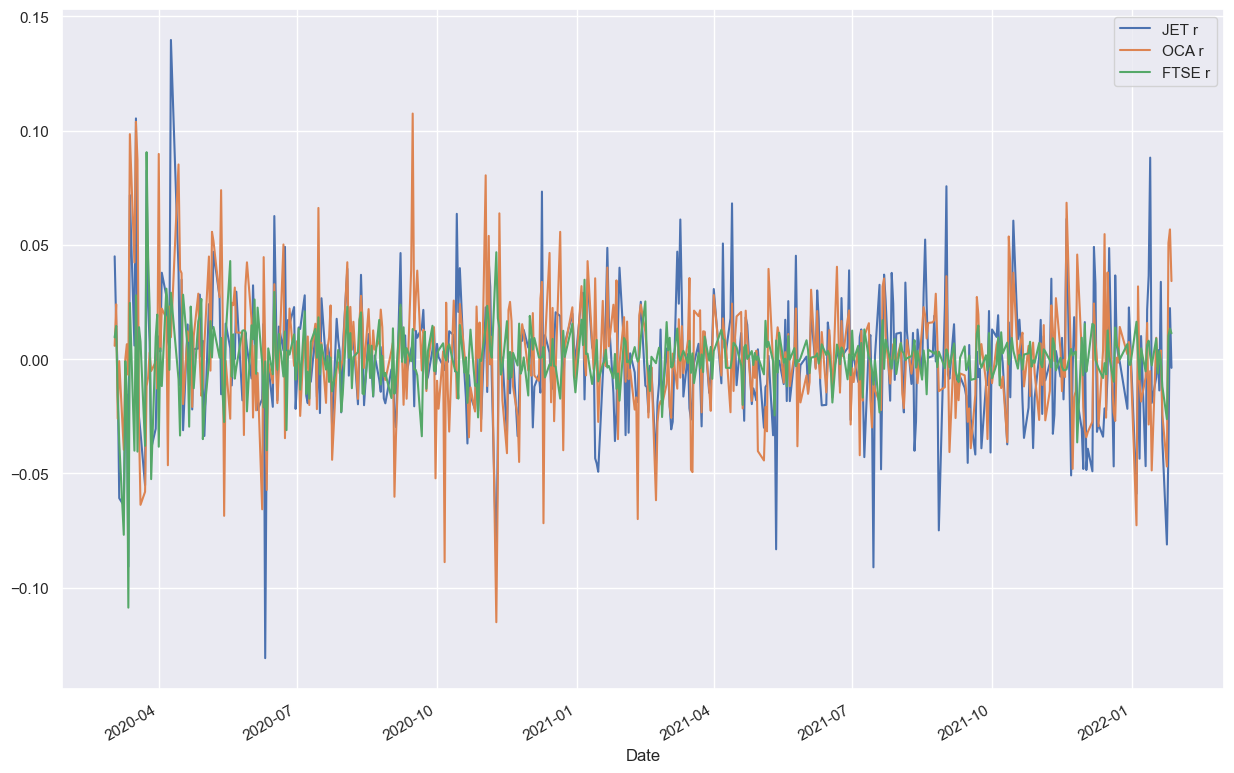

In [22]:
JETtr['Return'].plot(figsize=(15,10), label='JET r')
OCAtr['Return'].plot(label='OCA r')
FTSEtr['Return'].plot(label='FTSE r')
plt.legend()
plt.show()

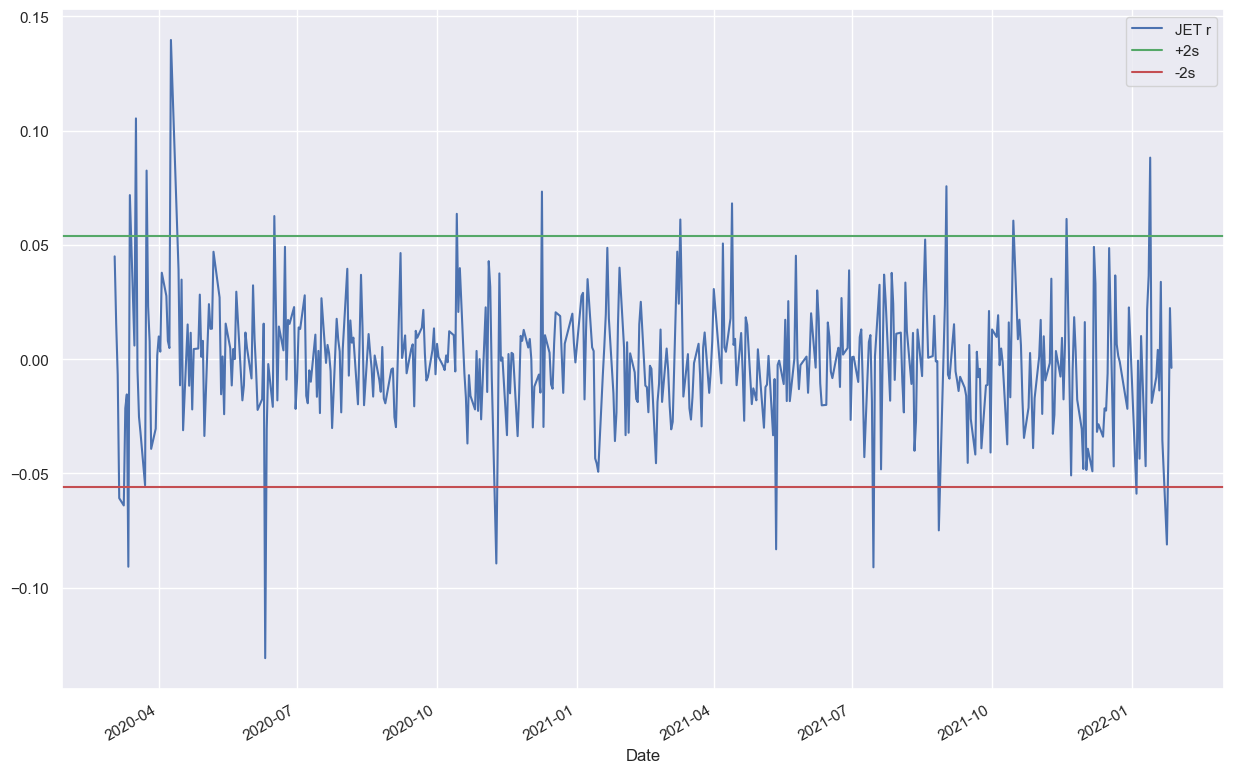

In [23]:
#Empirical Rules, Page 75 of Lecture 1
JETtr['Return'].plot(figsize=(15,10), label='JET r')
plt.axhline(y=JETtr['Return'].mean()+2*JETtr['Return'].std(),label='+2s',color='g')
plt.axhline(y=JETtr['Return'].mean()-2*JETtr['Return'].std(),label='-2s',color='r')
plt.legend()
plt.show()

In [24]:
#select rows by value 
pss=JETtr['Return'].mean()+2*JETtr['Return'].std()
JETtr.loc[JETtr['Return']>=pss]

,Adj Close,Return
Date,,
2020-03-13,5900.0,0.071753
2020-03-17,6560.0,0.105307
2020-03-24,6300.0,0.082474
2020-04-09,7558.0,0.139626
2020-06-16,7674.0,0.062587
2020-10-14,9404.0,0.063560
2020-12-09,8084.0,0.073287
2021-03-10,7262.0,0.061075
2021-04-13,7855.0,0.068126


In [25]:
nss=JETtr['Return'].mean()-2*JETtr['Return'].std()
JETtr.loc[JETtr['Return']<=nss]

,Adj Close,Return
Date,,
2020-03-06,6715.0,-0.060839
2020-03-09,6285.0,-0.064036
2020-03-12,5505.0,-0.090834
2020-06-10,7626.0,-0.130841
2020-11-09,8392.0,-0.089410
2021-05-12,6247.0,-0.083211
2021-07-15,5837.0,-0.091093
2021-08-27,6407.0,-0.074935
2022-01-04,3836.0,-0.058881


In [26]:
JETtr.loc[JETtr['Return']==JETtr['Return'].min()]

,Adj Close,Return
Date,,
2020-06-10,7626.0,-0.130841


### Statistics

In [27]:
JETtr.describe()

,Adj Close,Return
count,482.000000,481.000000
mean,7090.506224,-0.000990
std,1450.997225,0.027477
min,3451.000000,-0.130841
25%,6233.250000,-0.016590
50%,7191.000000,0.000159
75%,8348.000000,0.012788
max,9980.000000,0.139626


In [28]:
OCAtr.describe()

,Adj Close,Return
count,482.000000,481.000000
mean,2012.000000,0.001054
std,373.503372,0.027065
min,1077.000000,-0.115116
25%,1781.625000,-0.013947
50%,2000.000000,0.000611
75%,2237.500000,0.015485
max,2895.000000,0.107431


In [29]:
FTSEtr.describe()


,Adj Close,Return
count,482.000000,481.000000
mean,6601.435062,0.000367
std,570.722252,0.014294
min,4993.899902,-0.108738
25%,6104.700195,-0.004916
50%,6707.050049,0.000739
75%,7089.550049,0.007025
max,7611.200195,0.090530


What can you find by comparing the above tables?

In [30]:
# Return to risk
JETtr['Return'].mean()/JETtr['Return'].std()

-0.036022241600113816

In [31]:
# Return to risk
OCAtr['Return'].mean()/OCAtr['Return'].std()

0.03896150795115825

### Boxplot

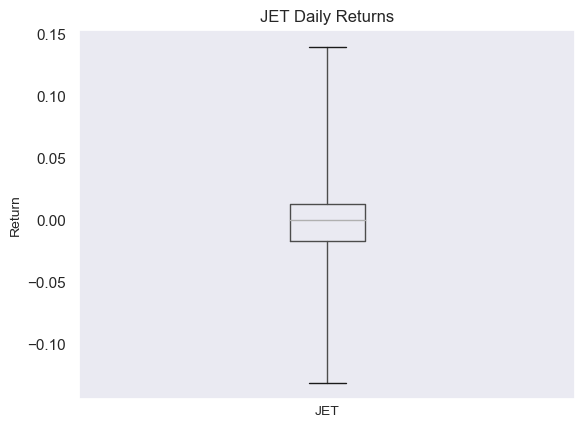

In [32]:
jetb=JETtr.boxplot(column='Return',whis=[0,100],grid=False)

jetb.set_title("JET Daily Returns",fontsize=12)
jetb.set_xlabel('JET', fontsize=10)
jetb.set_ylabel('Return', fontsize=10)
jetb.set_xticks([])
plt.show()

In [33]:
#Creturns=pd.concat([JETtr['Return'],OCAtr['Return'],FTSEtr['Return']],axis=1)
#Creturns.columns=['JET','OCA','FTSE']

In [34]:
AllTrainingReturns=pd.DataFrame({'JET r':JETtr['Return'],'OCA r':OCAtr['Return'],'FTSE r':FTSEtr['Return']})

In [35]:
AllTrainingReturns

,JET r,OCA r,FTSE r
Date,,,
2020-03-02,NaN,NaN,NaN
2020-03-03,0.044952,0.005806,0.009512
2020-03-04,0.015515,0.023979,0.014498
2020-03-05,-0.006944,-0.026019,-0.016169
2020-03-06,-0.060839,-0.000890,-0.036210
...,...,...,...
2022-01-21,-0.035538,-0.024298,-0.011984
2022-01-24,-0.081116,-0.047001,-0.026274
2022-01-25,-0.038986,0.050791,0.010182


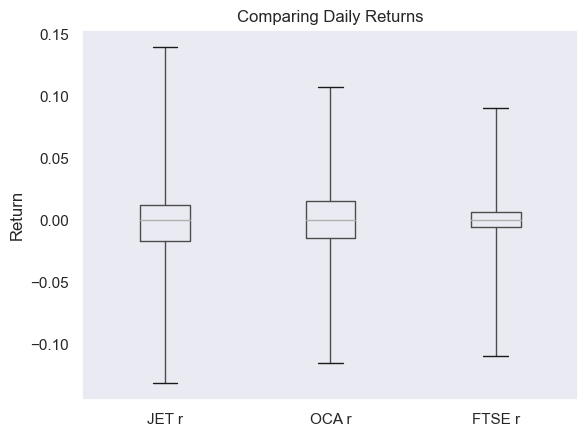

In [36]:
AllTrainingReturns.boxplot(whis=[0,100],grid=False)
plt.title('Comparing Daily Returns')
plt.ylabel('Return')
plt.show()

### Histogram

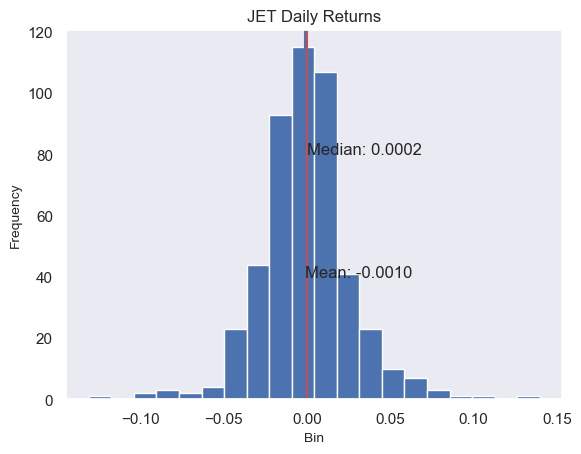

In [37]:
JETtr.hist(column='Return',bins=20,grid=False)

plt.title("JET Daily Returns",fontsize=12)
plt.xlabel('Bin', fontsize=10)
plt.ylabel('Frequency', fontsize=10)

plt.axvline(JETtr['Return'].mean())
plt.text(JETtr['Return'].mean()*1.1,40,'Mean: {:,.4f}'.format(JETtr['Return'].mean()))
1
plt.axvline(JETtr['Return'].median(),color='r')
plt.text(JETtr['Return'].median()*1.2,80,'Median: {:,.4f}'.format(JETtr['Return'].median()))

plt.show()

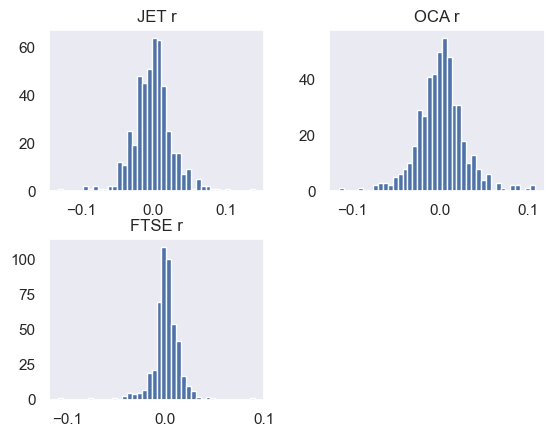

In [38]:
# it's better to draw histograms individually by the above codes

AllTrainingReturns.hist(bins=40,grid=False)
plt.show()

## Regression

In [39]:
# The three dataframes have the same column names, we should change the names and merge them together
JETtr.columns=['JET_Price','JET_Return']
OCAtr.columns=['OCA_Price','OCA_Return']
FTSEtr.columns=['FTSE_Price','FTSE_Return']
#concatenate them by columns
OverallTraining=pd.concat([JETtr,OCAtr,FTSEtr],axis=1)

In [40]:
OverallTraining.head()

,JET_Price,JET_Return,OCA_Price,OCA_Return,FTSE_Price,FTSE_Return
Date,,,,,,
2020-03-02,6785.0,NaN,1119.5,NaN,6654.899902,NaN
2020-03-03,7090.0,0.044952,1126.0,0.005806,6718.200195,0.009512
2020-03-04,7200.0,0.015515,1153.0,0.023979,6815.600098,0.014498
2020-03-05,7150.0,-0.006944,1123.0,-0.026019,6705.399902,-0.016169
2020-03-06,6715.0,-0.060839,1122.0,-0.000890,6462.600098,-0.036210


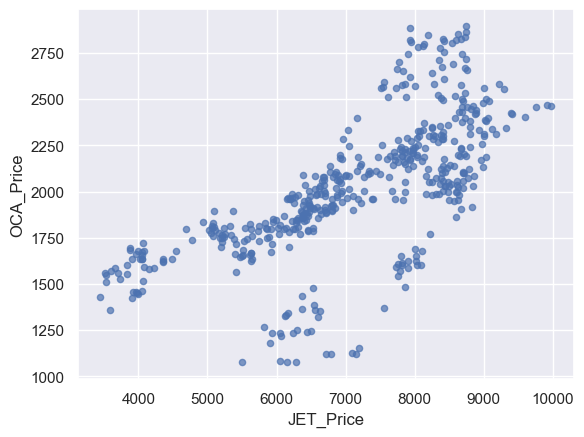

In [41]:
OverallTraining.plot.scatter(x='JET_Price',y='OCA_Price',alpha=0.7)
plt.show()

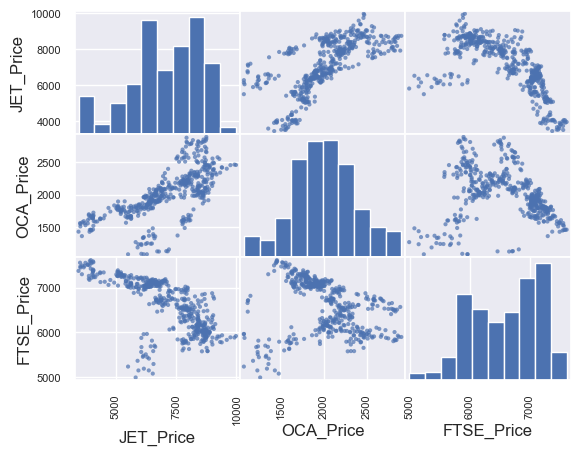

In [42]:
pd.plotting.scatter_matrix(OverallTraining.iloc[:,[0,2,4]], alpha=0.7)
plt.show()

In [43]:
OverallTraining.iloc[:,[0,2,4]].corr(method='pearson')

,JET_Price,OCA_Price,FTSE_Price
JET_Price,1.000000,0.687073,-0.690543
OCA_Price,0.687073,1.000000,-0.219522
FTSE_Price,-0.690543,-0.219522,1.000000


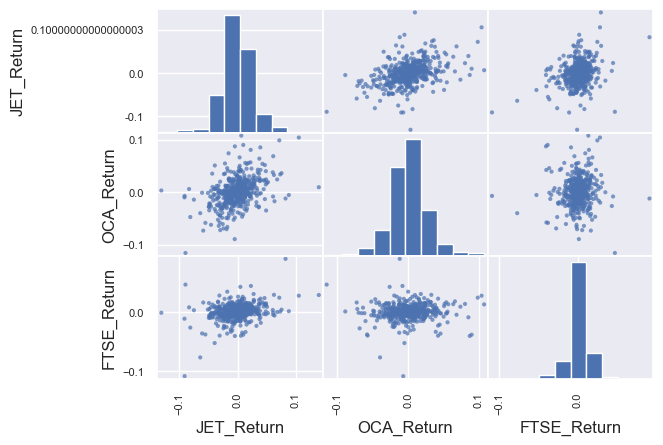

In [44]:
pd.plotting.scatter_matrix(OverallTraining.iloc[:,[1,3,5]], alpha=0.7)
plt.show()

In [45]:
OverallTraining.iloc[:,[1,3,5]].corr(method='pearson')

,JET_Return,OCA_Return,FTSE_Return
JET_Return,1.000000,0.419511,0.292888
OCA_Return,0.419511,1.000000,0.053104
FTSE_Return,0.292888,0.053104,1.000000


In [46]:
JET_OCA_reg=sfa.ols('JET_Price ~ OCA_Price', data=OverallTraining).fit()

In [47]:
JET_FTSE_reg=sfa.ols('JET_Price ~ FTSE_Price', data=OverallTraining).fit()

In [48]:
JET_OCA_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              JET_Price   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     429.2
Date:                Wed, 03 May 2023   Prob (F-statistic):           1.39e-68
Time:                        19:50:26   Log-Likelihood:                -4038.4
No. Observations:                 482   AIC:                             8081.
Df Residuals:                     480   BIC:                             8089.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1720.1500    263.639      6.525      0.000    1202.121    2238.179
OCA_Price      2.6692      0.129     20.717      0.000       2.416       2.922
==============================================================================
Omnibus:                        8.475   Durbin-Watson:                   0.031
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                5.108
Skew:                          -0.024   Prob(JB):                       0.0778
Kurtosis:                       2.498   Cond. No.                     1.12e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
JET_FTSE_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              JET_Price   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     437.5
Date:                Wed, 03 May 2023   Prob (F-statistic):           1.55e-69
Time:                        19:50:27   Log-Likelihood:                -4036.3
No. Observations:                 482   AIC:                             8077.
Df Residuals:                     480   BIC:                             8085.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.868e+04    556.143     33.589      0.000    1.76e+04    1.98e+04
FTSE_Price    -1.7556      0.084    -20.917      0.000      -1.921      -1.591
==============================================================================
Omnibus:                       89.537   Durbin-Watson:                   0.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.541
Skew:                          -1.123   Prob(JB):                     5.56e-33
Kurtosis:                       4.534   Cond. No.                     7.70e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.7e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

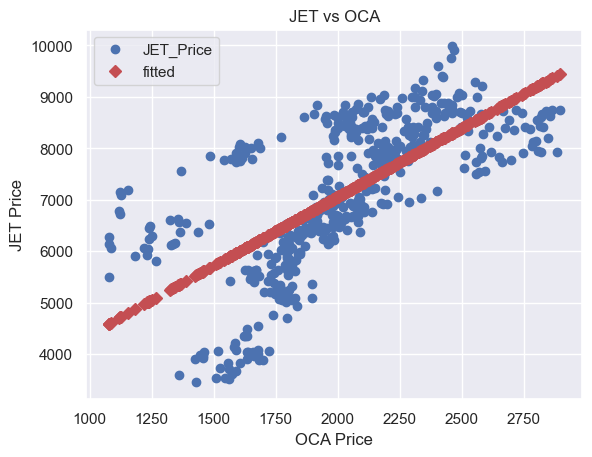

In [50]:
sa.graphics.plot_fit(JET_OCA_reg,exog_idx='OCA_Price',vlines=False)
plt.ylabel("JET Price")
plt.xlabel("OCA Price")
plt.title("JET vs OCA")
plt.show()

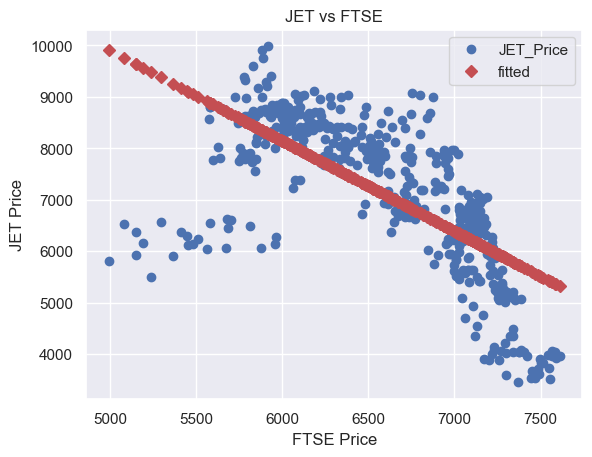

In [51]:
sa.graphics.plot_fit(JET_FTSE_reg,exog_idx='FTSE_Price',vlines=False)
plt.ylabel("JET Price")
plt.xlabel("FTSE Price")
plt.title("JET vs FTSE")
plt.show()

In [52]:
JET_OCA_rreg=sfa.ols('JET_Return ~ OCA_Return', data=OverallTraining).fit()

In [53]:
JET_OCA_rreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             JET_Return   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     102.3
Date:                Wed, 03 May 2023   Prob (F-statistic):           6.32e-22
Time:                        19:50:28   Log-Likelihood:                 1093.4
No. Observations:                 481   AIC:                            -2183.
Df Residuals:                     479   BIC:                            -2175.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0014      0.001     -1.263      0.207      -0.004       0.001
OCA_Return     0.4259      0.042     10.114      0.000       0.343       0.509
==============================================================================
Omnibus:                       52.747   Durbin-Watson:                   1.847
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              344.886
Skew:                           0.086   Prob(JB):                     1.28e-75
Kurtosis:                       7.145   Cond. No.                         37.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
# Multiple Regression
JET_OCA_FTSE_reg=sfa.ols('JET_Price ~ OCA_Price + FTSE_Price', data=OverallTraining).fit()

In [55]:
JET_OCA_FTSE_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              JET_Price   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     839.9
Date:                Wed, 03 May 2023   Prob (F-statistic):          2.51e-157
Time:                        19:50:28   Log-Likelihood:                -3829.5
No. Observations:                 482   AIC:                             7665.
Df Residuals:                     479   BIC:                             7678.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.221e+04    442.526     27.592      0.000    1.13e+04    1.31e+04
OCA_Price      2.1856      0.086     25.502      0.000       2.017       2.354
FTSE_Price    -1.4416      0.056    -25.703      0.000      -1.552      -1.331
==============================================================================
Omnibus:                        3.612   Durbin-Watson:                   0.124
Prob(Omnibus):                  0.164   Jarque-Bera (JB):                3.578
Skew:                          -0.211   Prob(JB):                        0.167
Kurtosis:                       2.983   Cond. No.                     9.82e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.82e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
JET_OCA_FTSE_reg.pvalues

Intercept     5.106019e-101
OCA_Price      2.946285e-91
FTSE_Price     3.324429e-92
dtype: float64

## Time Series

In [57]:
JETte.columns=['JET_Price','JET_Return']
OCAte.columns=['OCA_Price','OCA_Return']
FTSEte.columns=['FTSE_Price','FTSE_Return']

### Moving Average

In [58]:
ma5=JETtr.rolling(5).mean()

In [59]:
ma20=JETtr.rolling(20).mean()

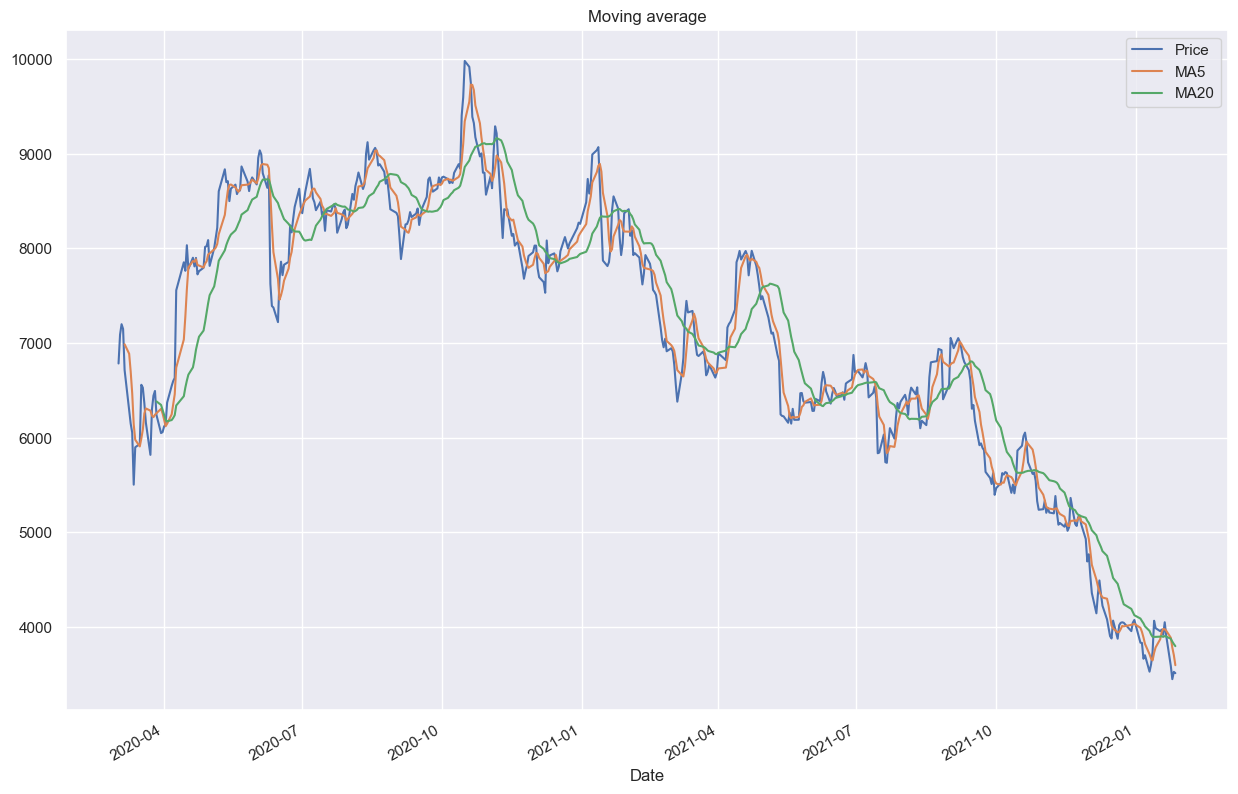

In [60]:
JETtr['JET_Price'].plot(figsize=(15,10), title= 'Moving average', label='Price')
ma5['JET_Price'].plot(label='MA5')
ma20['JET_Price'].plot(label='MA20')
plt.legend()

In [61]:
#creat forecasts
JETma5fcsts=pd.Series([ma5['JET_Price'][-1]]*19)
JETma5fcsts.index=JETte.index

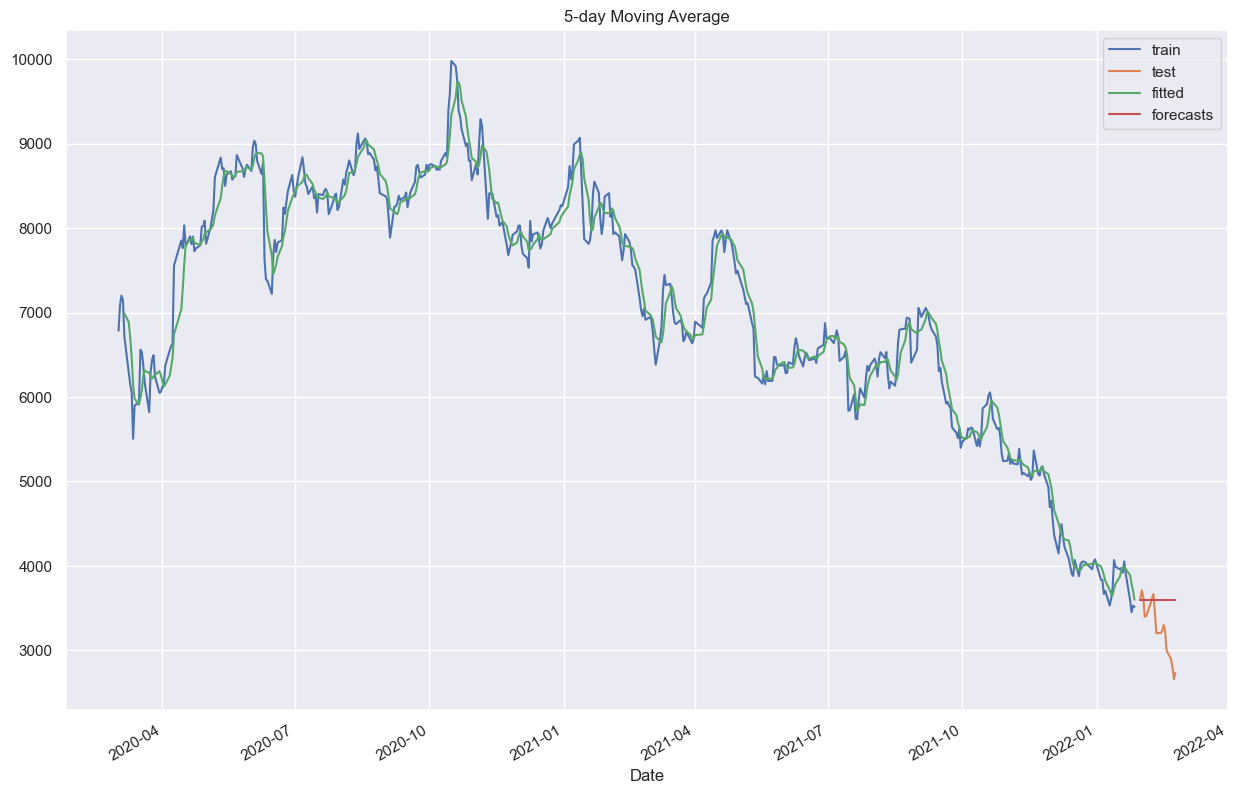

In [62]:
JETtr['JET_Price'].plot(figsize=(15,10),label='train',title='5-day Moving Average')
JETte['JET_Price'].plot(label='test')
ma5['JET_Price'].plot(label='fitted')
JETma5fcsts.plot(label='forecasts')
plt.legend()
plt.show()

In [63]:
MAE(JETte['JET_Price'],JETma5fcsts)

346.6578947368421

In [64]:
MSE(JETte['JET_Price'],JETma5fcsts)

206777.27631578947

In [65]:
print(
    'MAE: {:,.4f}'.format(MAE(JETte['JET_Price'],JETma5fcsts)),
    '\nMSE: {:,.4f}'.format(MSE(JETte['JET_Price'],JETma5fcsts))
                         )

MAE: 346.6579 
MSE: 206,777.2763


### Single Exponential Smoothing

In [66]:
JETses=SES(JETtr['JET_Price'],initialization_method="estimated").fit()

C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [67]:
JETsesfcsts=JETses.forecast(19)
JETsesfcsts.index=JETte.index

C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


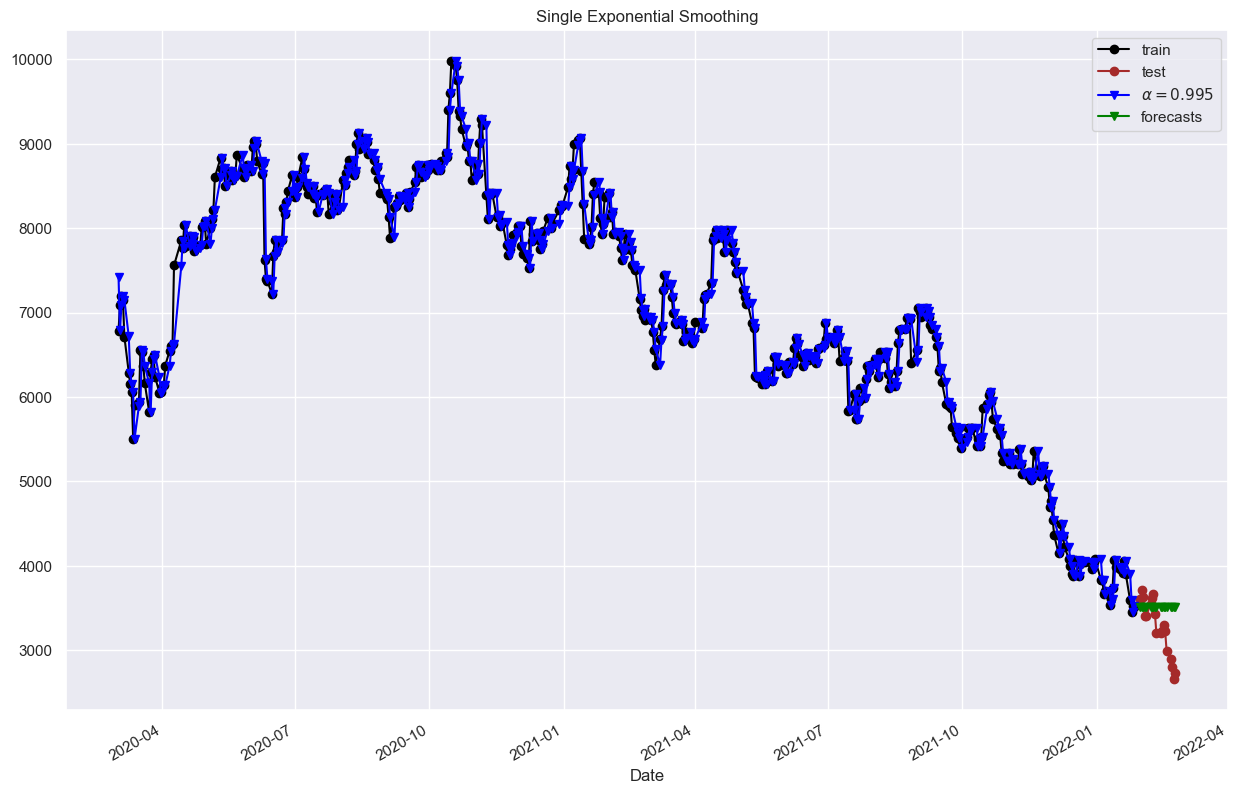

In [68]:
JETtr['JET_Price'].plot(figsize=(15,10),marker='o',color='black',label='train',title='Single Exponential Smoothing')
JETte['JET_Price'].plot(marker='o',color='brown',label='test')
JETses.fittedvalues.plot(marker='v', color='blue',label=r'$\alpha=%s$'%JETses.model.params['smoothing_level'])
JETsesfcsts.plot(marker='v', color='green',label='forecasts')
plt.legend()
plt.show()

In [69]:
print(
    'MAE: {:,.4f}'.format(MAE(JETte['JET_Price'],JETsesfcsts)),
    '\nMSE: {:,.4f}'.format(MSE(JETte['JET_Price'],JETsesfcsts))
)

MAE: 310.7873 
MSE: 159,896.6132


### Double Exponential Smoothing

In [70]:
JETdes=DES(JETtr['JET_Price'],initialization_method="estimated").fit()

C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [71]:
JETdesfcsts=JETdes.forecast(19)
JETdesfcsts.index=JETte.index

C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


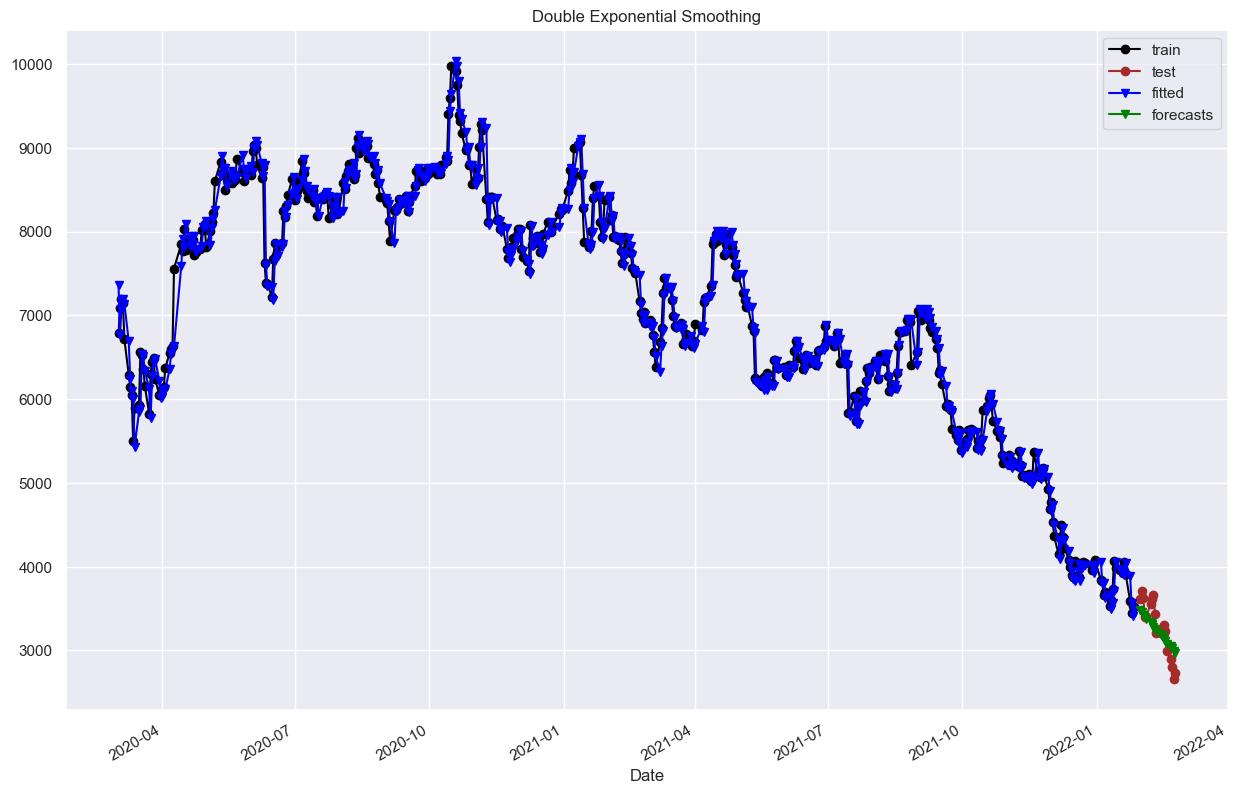

In [72]:
JETtr['JET_Price'].plot(figsize=(15,10),marker='o',color='black',label='train',title='Double Exponential Smoothing')
JETte['JET_Price'].plot(marker='o',color='brown',label='test')
JETdes.fittedvalues.plot(marker='v', color='blue',label='fitted')
JETdesfcsts.plot(marker='v', color='green',label='forecasts')
plt.legend()
plt.show()

In [73]:
print(
    'MAE: {:,.4f}'.format(MAE(JETte['JET_Price'],JETdesfcsts)),
    '\nMSE: {:,.4f}'.format(MSE(JETte['JET_Price'],JETdesfcsts))
)

MAE: 162.8446 
MSE: 38,476.8763


### Holt's Winters (Additive)

In [74]:
JETtesa=TES(JETtr['JET_Price'],seasonal_periods=4, trend='add', seasonal='add', use_boxcox=True, initialization_method="estimated").fit()
JETtesfcstsa=JETtesa.forecast(19)
JETtesfcstsa.index=JETte.index

C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


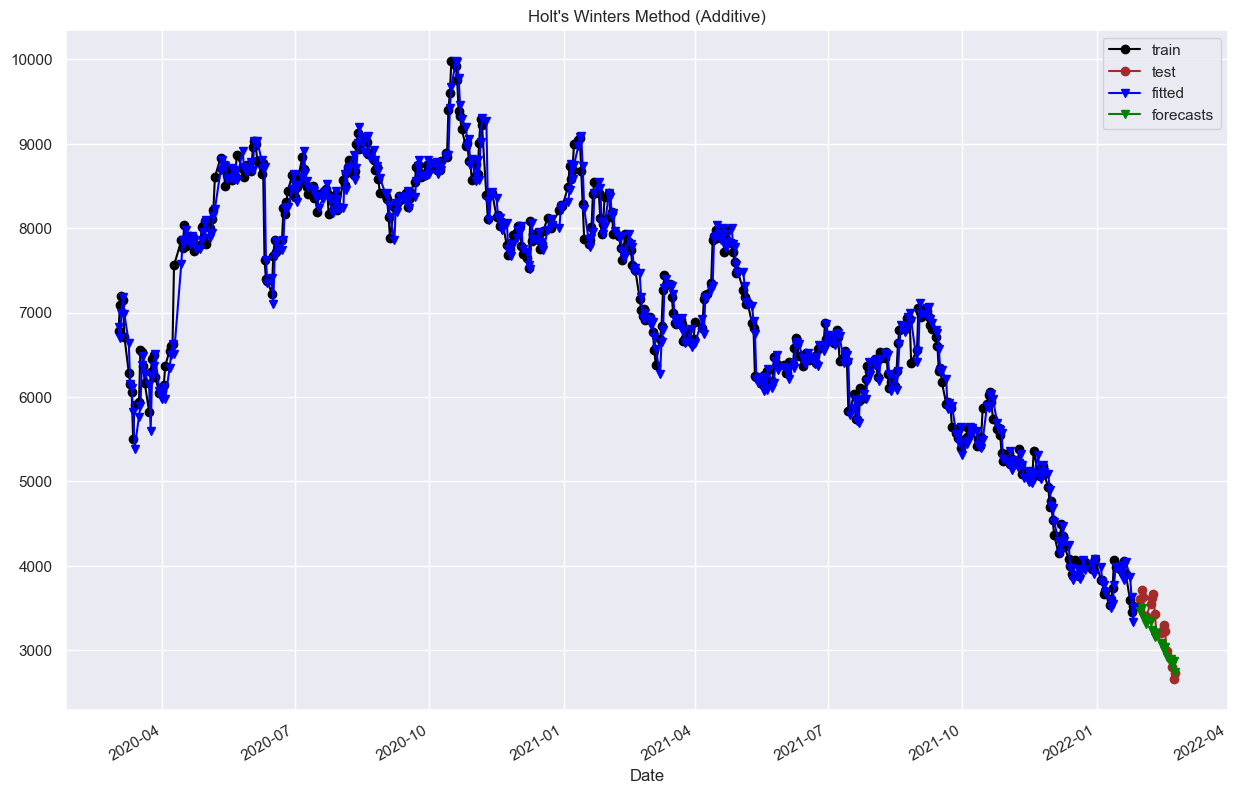

In [75]:
JETtr['JET_Price'].plot(figsize=(15,10),marker='o',color='black',label='train',title="Holt's Winters Method (Additive)")
JETte['JET_Price'].plot(marker='o',color='brown',label='test')
JETtesa.fittedvalues.plot(marker='v', color='blue',label='fitted')
JETtesfcstsa.plot(marker='v', color='green',label='forecasts')
plt.legend()
plt.show()

In [76]:
print(
    'MAE: {:,.4f}'.format(MAE(JETte['JET_Price'],JETtesfcstsa)),
    '\nMSE: {:,.4f}'.format(MSE(JETte['JET_Price'],JETtesfcstsa))
)

MAE: 164.6826 
MSE: 42,673.5721


### Holt's Winters (Multiplicative)

In [77]:
JETtesm=TES(JETtr['JET_Price'],seasonal_periods=4, trend='add', seasonal='mul', use_boxcox=True, initialization_method="estimated").fit()
JETtesfcstsm=JETtesm.forecast(19)
JETtesfcstsm.index=JETte.index

C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


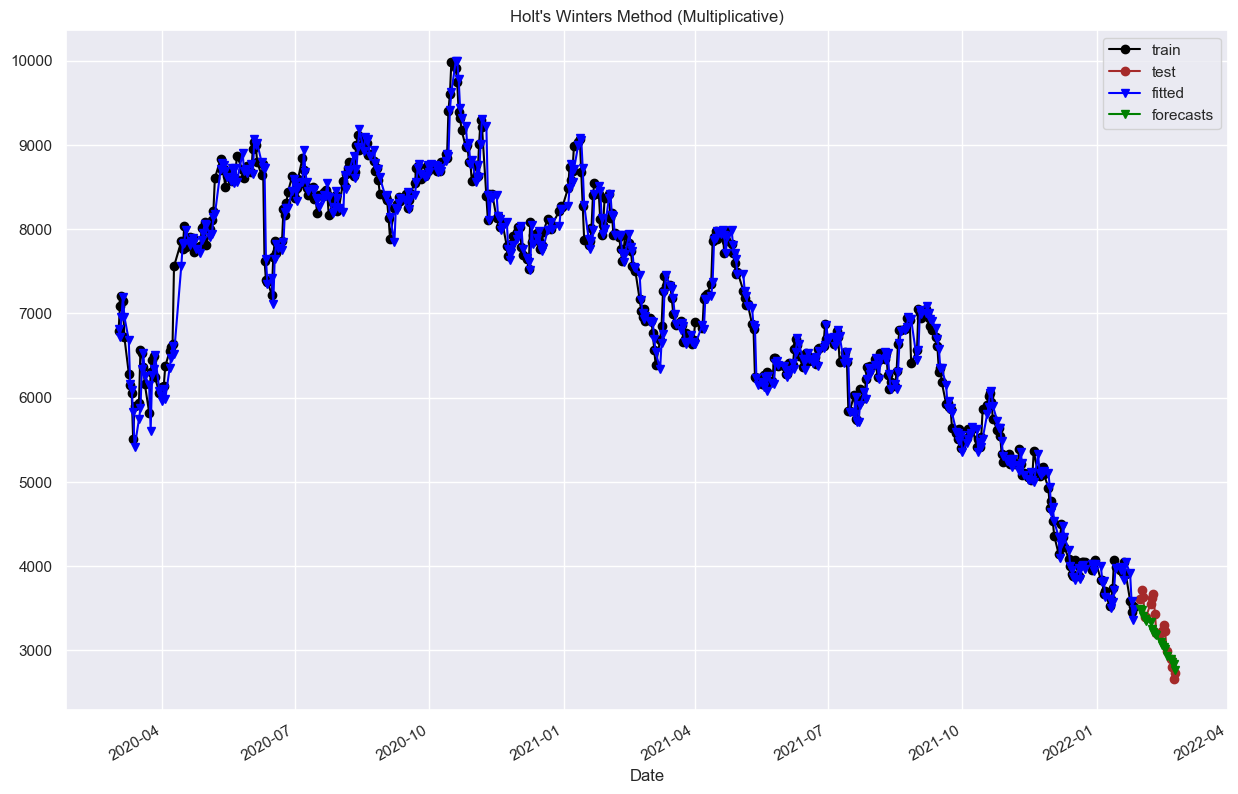

In [78]:
JETtr['JET_Price'].plot(figsize=(15,10),marker='o',color='black',label='train',title="Holt's Winters Method (Multiplicative)")
JETte['JET_Price'].plot(marker='o',color='brown',label='test')
JETtesm.fittedvalues.plot(marker='v', color='blue',label='fitted')
JETtesfcstsm.plot(marker='v', color='green',label='forecasts')
plt.legend()
plt.show()

In [79]:
print(
    'MAE: {:,.4f}'.format(MAE(JETte['JET_Price'],JETtesfcstsm)),
    '\nMSE: {:,.4f}'.format(MSE(JETte['JET_Price'],JETtesfcstsm))
)

MAE: 159.1028 
MSE: 39,330.9363
